## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from keras.callbacks import ModelCheckpoint

SAVE_BEST_ONLYs= [True, False]



In [8]:


results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for best_only in SAVE_BEST_ONLYs:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Save best only = %s" % (str(best_only)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    file_name = "tmp-save-best-only-%s.h5" % (str(best_only))
    model_ckpt = ModelCheckpoint(filepath=file_name, 
                             monitor="val_loss", 
                             save_best_only=best_only)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[model_ckpt]
             )

    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
    
    exp_name_tag = "exp-save-best-only-%s" % (str(best_only))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc,
                             'loss_loadback': loss_loadback,
                              'acc_loadback':acc_loadback}

W0722 21:02:32.809019 139644220405568 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0722 21:02:32.811663 139644220405568 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0722 21:02:32.833958 139644220405568 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 21:02:32.836349 139644220405568 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The n

Experiment with Save best only = True


W0722 21:02:33.441758 139644220405568 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

W0722 21:02:33.647559 139644220405568 deprecation.py:323] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.2203 - acc: 0.2706 - val_loss: 2.1421 - val_acc: 0.3064
Epoch 2/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.7501 - acc: 0.3915 - val_loss: 1.8135 - val_acc: 0.3876
Epoch 3/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.6275 - acc: 0.4330 - val_loss: 1.7267 - val_acc: 0.4130
Epoch 4/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.5531 - acc: 0.4593 - val_loss: 1.6352 - val_acc: 0.4303
Epoch 5/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4984 - acc: 0.4796 - val_loss: 1.6036 - val_acc: 0.4390
Epoch 6/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.4508 - acc: 0.4942 - val_loss: 1.5698 - val_acc: 0.4503
Epoch 7/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.4127 - acc: 0.5090 - val_loss: 1.5526 -

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.2290 - acc: 0.2615 - val_loss: 2.0689 - val_acc: 0.3152
Epoch 2/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.7327 - acc: 0.3896 - val_loss: 1.8132 - val_acc: 0.3697
Epoch 3/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.6049 - acc: 0.4365 - val_loss: 1.6930 - val_acc: 0.4115
Epoch 4/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.5304 - acc: 0.4638 - val_loss: 1.6422 - val_acc: 0.4277
Epoch 5/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.4744 - acc: 0.4854 - val_loss: 1.5869 - val_acc: 0.4413
Epoch 6/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.4291 - acc: 0.5009 - val_loss: 1.5622 - val_acc: 0.4521
Epoch 7/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.3906 - acc: 0.5146 - val_loss: 1.5336 - v

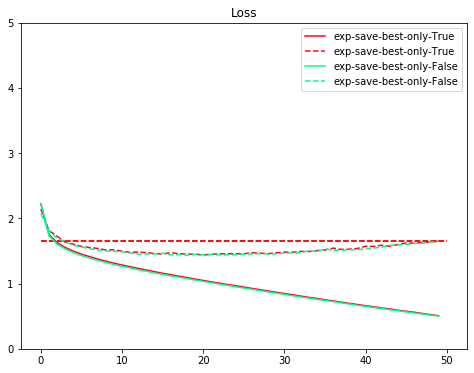

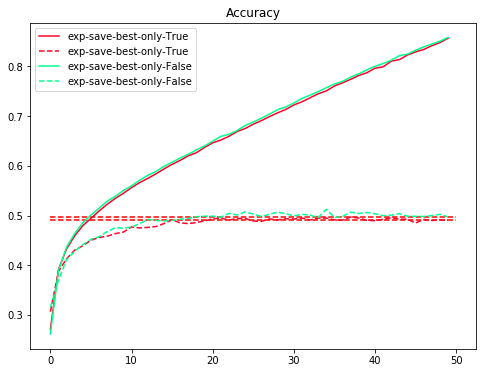

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.hlines(y=results[cond]['loss_loadback'], xmin=0, xmax=len(results[cond]['train-loss']), colors='r', linestyles='--')
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.hlines(y=results[cond]['acc_loadback'], xmin=0, xmax=len(results[cond]['train-loss']), colors='r', linestyles='--')
plt.title("Accuracy")
plt.legend()
plt.show()

In [15]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model_ckpt = ModelCheckpoint(filepath="tmp_save_weights_only.h5", 
                             monitor="val_loss",
                             save_weights_only=True)
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
__________

In [10]:
# Load back
#reference
#https://blog.gtwang.org/programming/keras-save-and-load-model-tutorial/
# Load back
model = keras.models.load_model("tmp-save-best-only-True.h5")
model.load_weights("tmp_save_weights_only.h5", by_name = True)


# Collect results
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 120us/step


W0722 21:00:47.629072 140429909952320 legend.py:1282] No handles with labels found to put in legend.


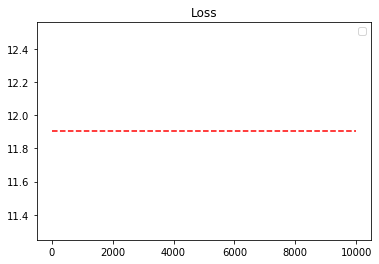

W0722 21:00:47.940830 140429909952320 legend.py:1282] No handles with labels found to put in legend.


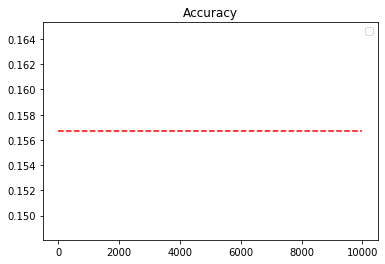

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.hlines(y=loss_loadback, xmin=0, xmax=len(x_test), colors='r', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()


plt.hlines(y=acc_loadback, xmin=0, xmax=len(x_test), colors='r', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()